<a href="https://colab.research.google.com/github/ori112/mall_csutomers/blob/main/mall_csutomers_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid", context="notebook")
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

In [51]:
#reading project file
df = pd.read_csv(r"/content/Mall_Customers.csv")

In [52]:
#inspecting column headers
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
#inspecting data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [54]:
#renaming columns for better use
df.rename(columns={"Spending Score (1-100)" : "score", "Annual Income (k$)" : "annual_income"}, inplace = True)
df.head()

,CustomerID,Gender,Age,annual_income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


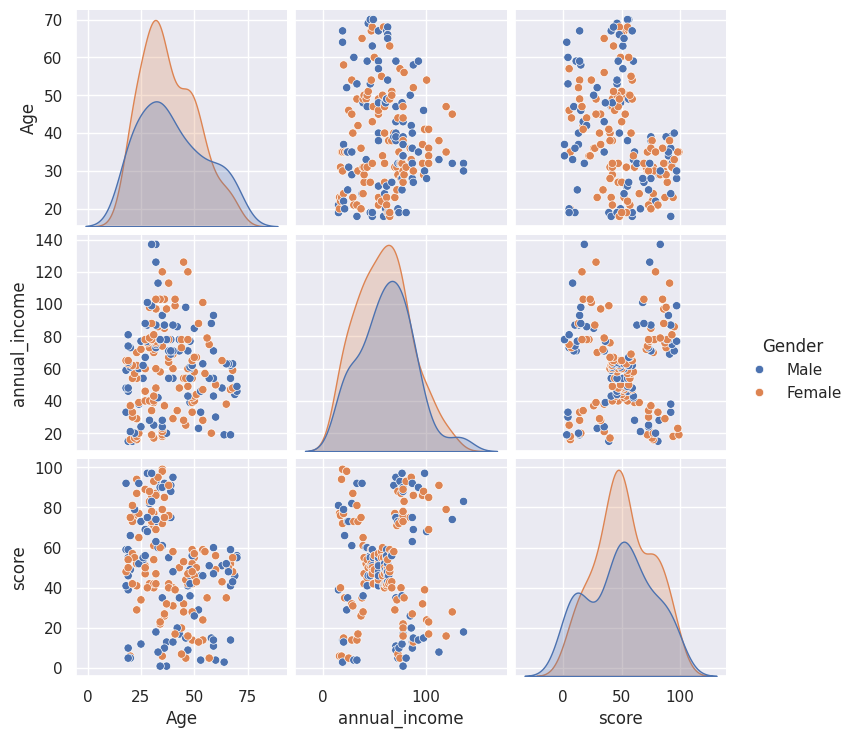

In [55]:
#inspecting data with pairplot
sns.pairplot(data=df.drop(columns=("CustomerID")), hue="Gender")

In [56]:
#dropping gender since we can see it has no relation to segmenting our customers
df = df.drop(columns=(["CustomerID", "Gender"]))
df.columns

Index(['Age', 'annual_income', 'score'], dtype='object')

#Kmeans

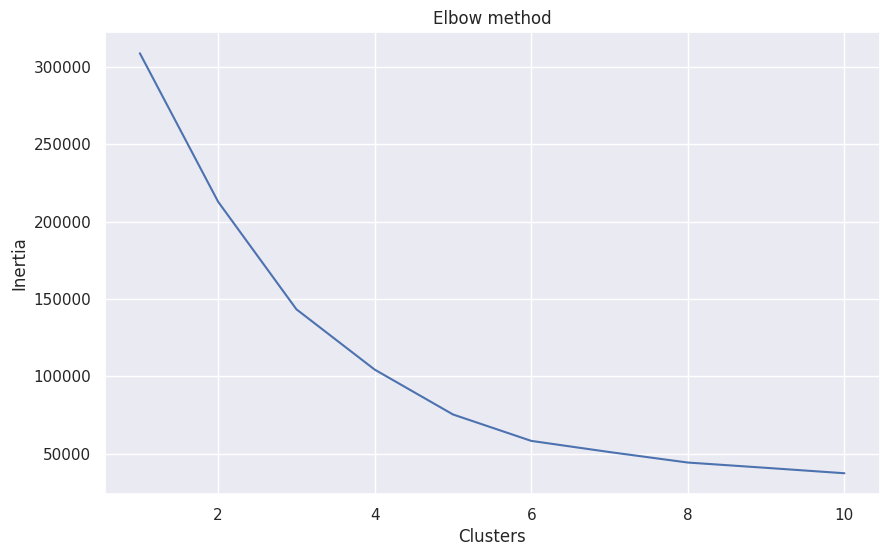

In [58]:
#initiating the Kmeans model, training and inspecting by elbow methos
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)

plt.figure(figsize=(10,6))

sns.lineplot(x=list(range(1, 11)), y=clusters)
plt.title('Elbow method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

plt.show()

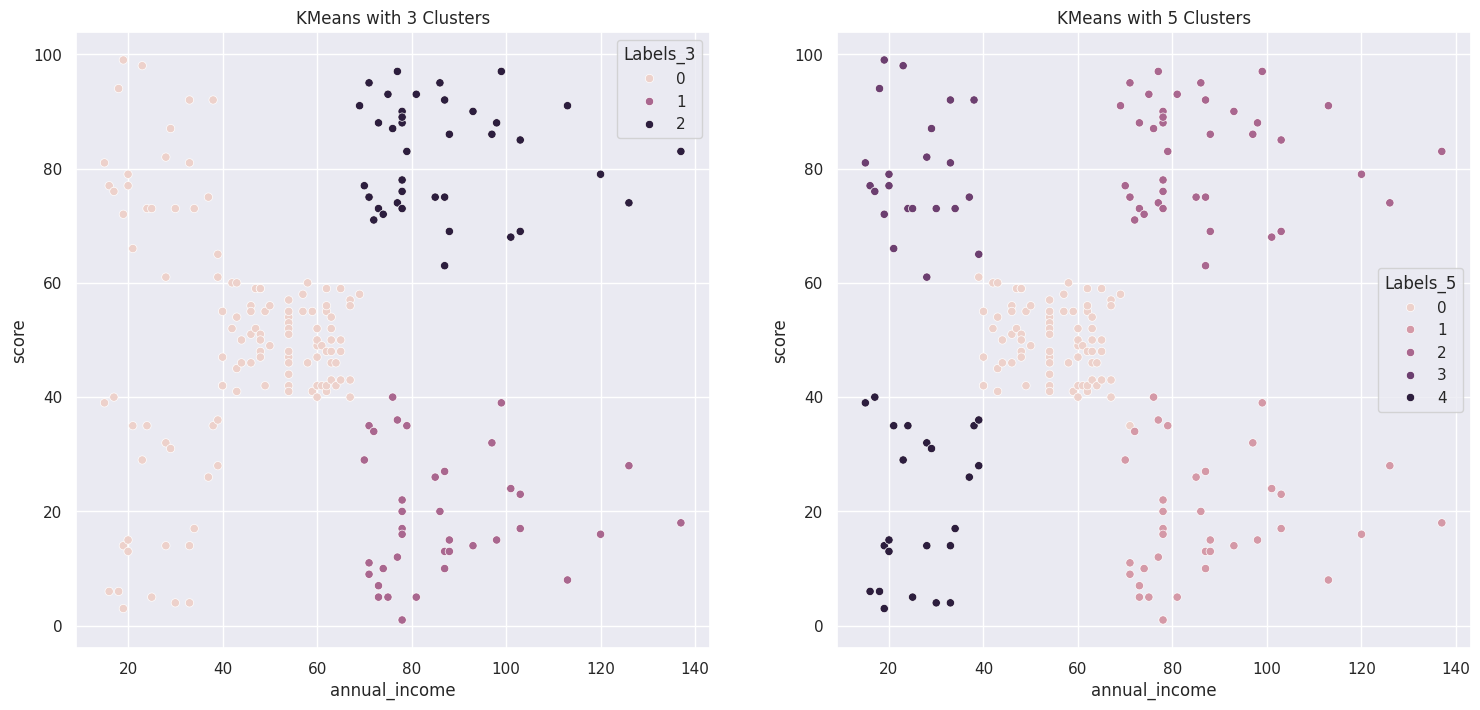

In [39]:
# inspecting scatters with 3 \ 5 K's
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 3 K's
km3 = KMeans(n_clusters=3).fit(df)
df['Labels_3'] = km3.labels_  # Use a unique column name for labels

sns.scatterplot(x=df['annual_income'], y=df['score'], hue=df['Labels_3'], ax=axes[0])
axes[0].set_title('KMeans with 3 Clusters')

# 5 K's
km5 = KMeans(n_clusters=5).fit(df)
df['Labels_5'] = km5.labels_  # Use a unique column name for labels

sns.scatterplot(x=df['annual_income'], y=df['score'], hue=df['Labels_5'], ax=axes[1])
axes[1].set_title('KMeans with 5 Clusters')

plt.show()

### from this point on, I will continue with 5 K's since it seems to be the best fit

#Agglomerative

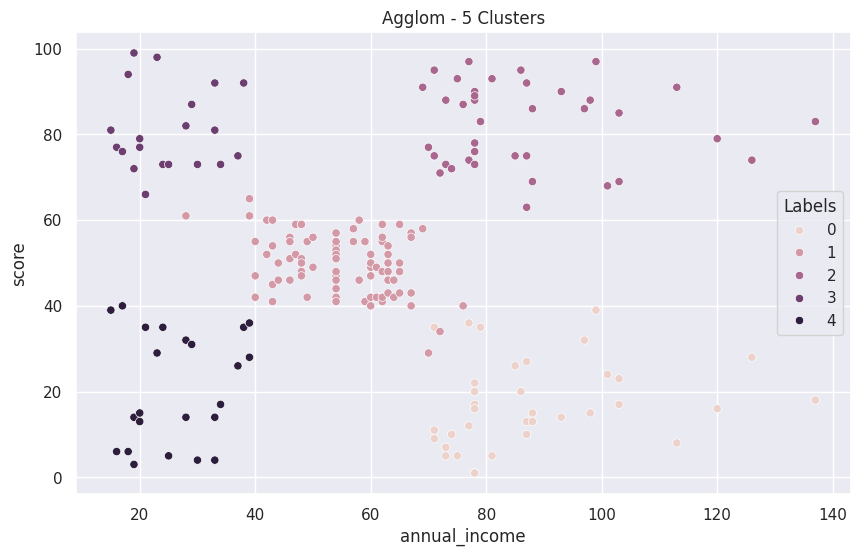

In [42]:
#starting with linkage = average
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(df)
df['Labels'] = agglom.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['annual_income'], y=df['score'], hue=df['Labels'])
plt.title('Agglom - 5 Clusters')
plt.show()

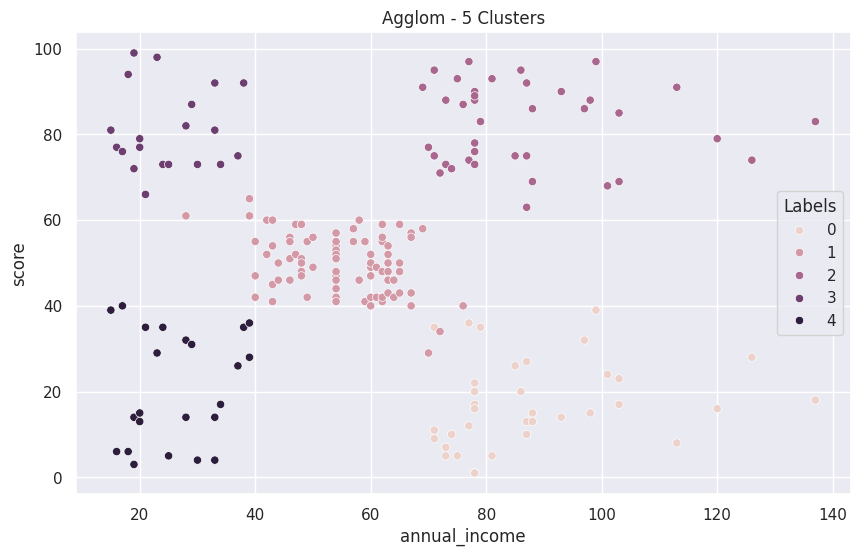

In [43]:
#continuing with linkage = complete
agglom = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(df)
df['Labels'] = agglom.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['annual_income'], y=df['score'], hue=df['Labels'])
plt.title('Agglom - 5 Clusters')
plt.show()

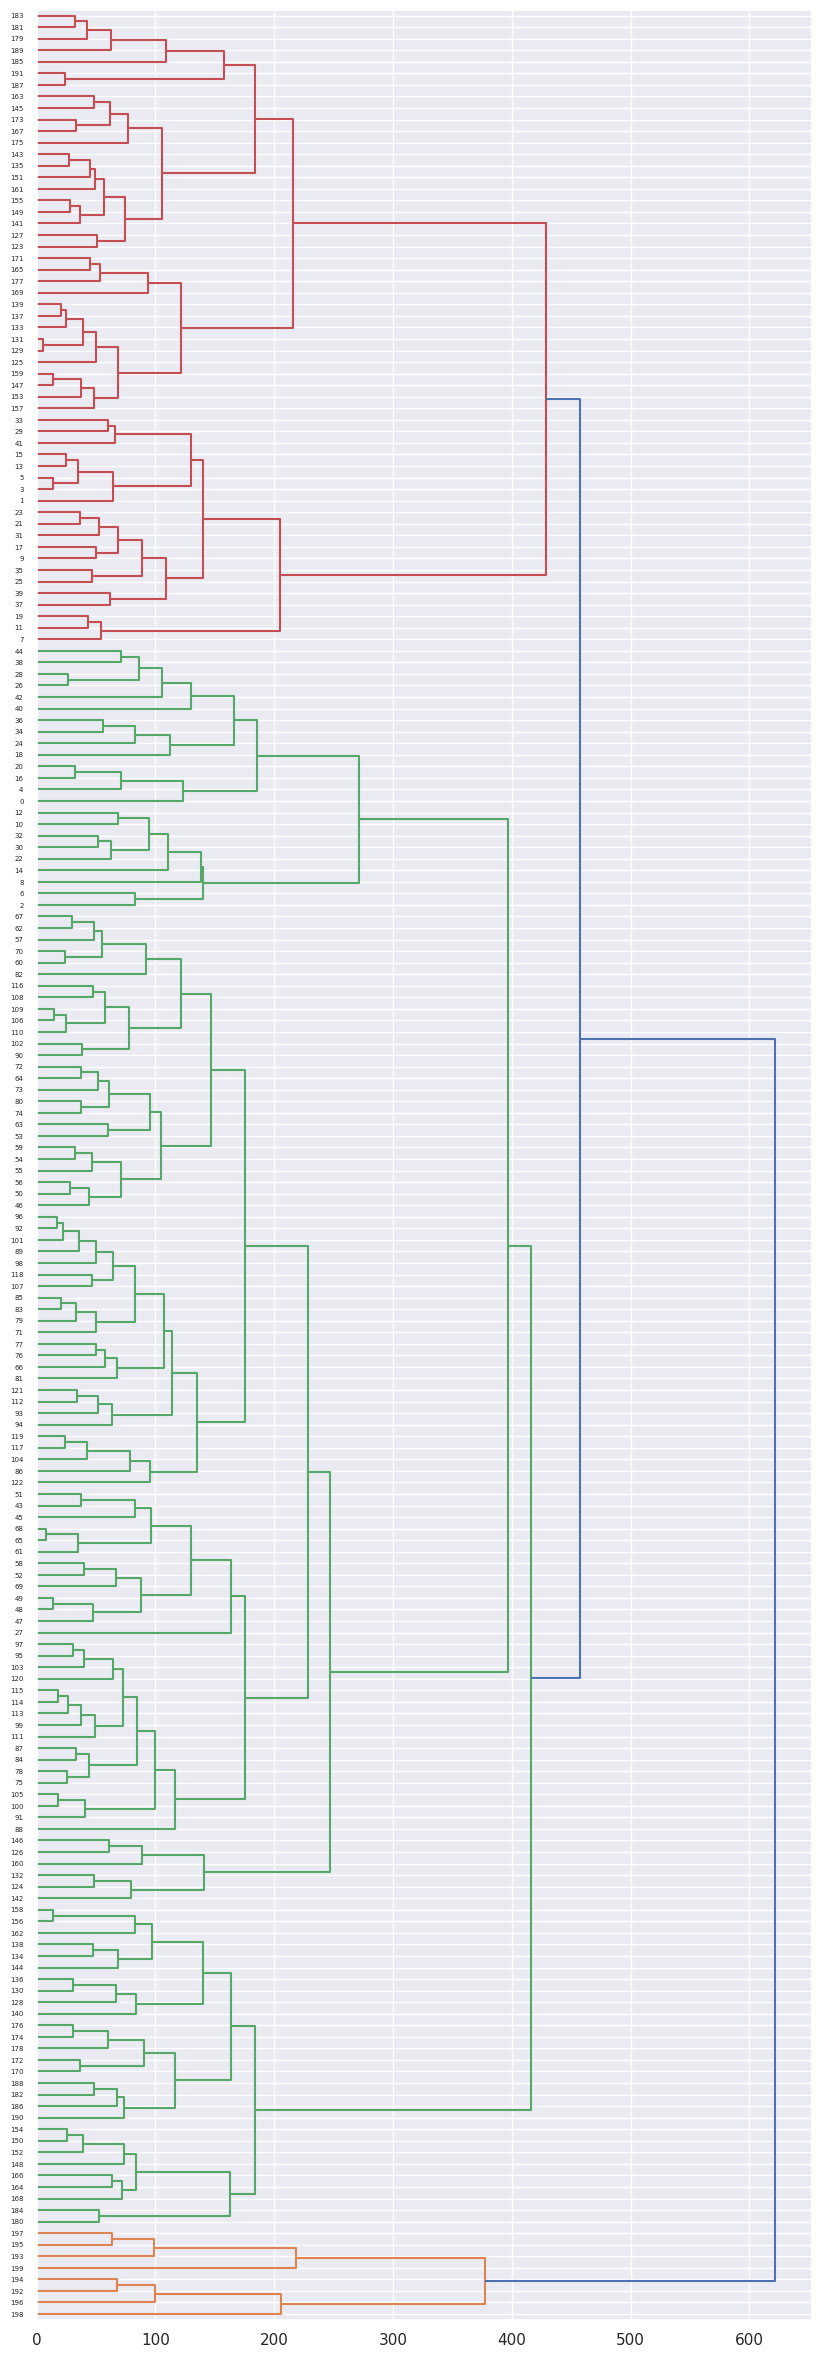

In [48]:
#inspecting with dendogram for linkage average
dist = distance_matrix(df, df)
Z = hierarchy.linkage(dist, 'average')

plt.figure(figsize=(10, 30))
dendro = hierarchy.dendrogram(Z, orientation="right")


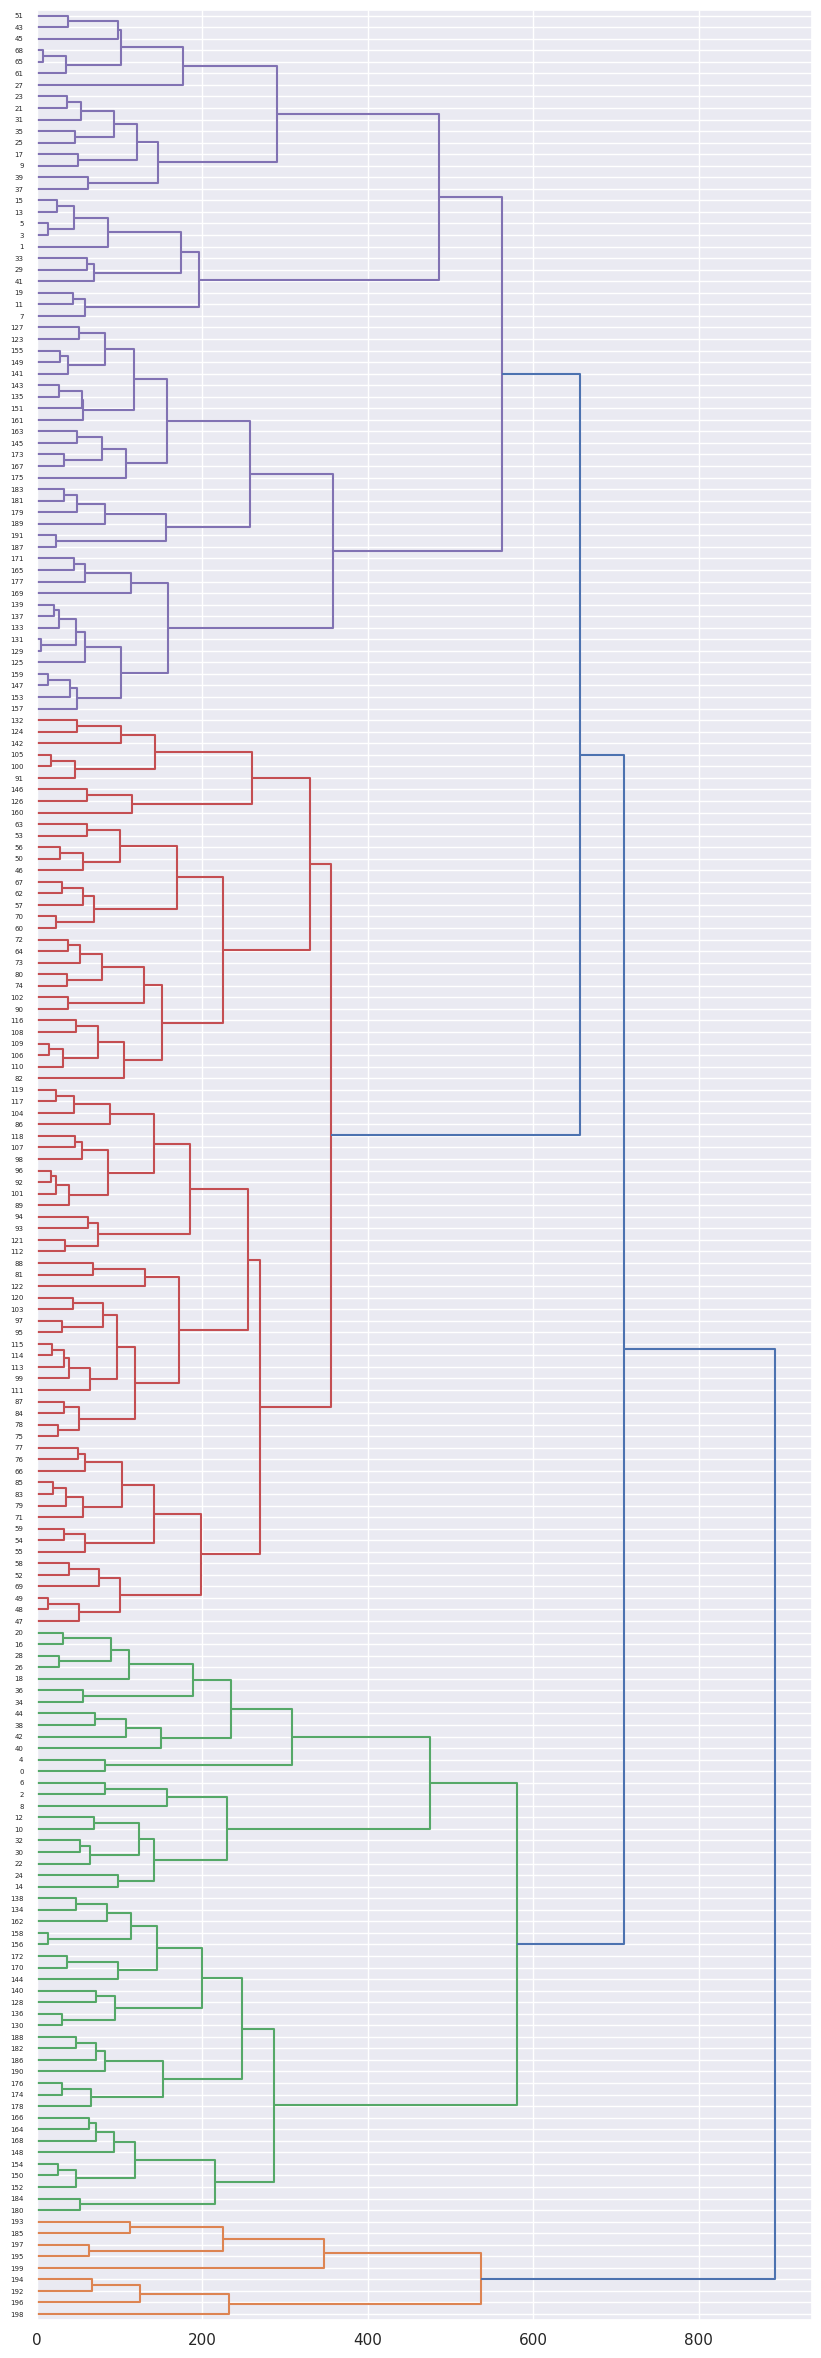

In [49]:
#inspecting with dendogram for linkage complete
dist = distance_matrix(df, df)
Z = hierarchy.linkage(dist, 'complete')

plt.figure(figsize=(10, 30))
dendro = hierarchy.dendrogram(Z, orientation="right")
